## Machine Learning Model Building Pipeline: Data Analysis

In the following videos, we will take you through a practical example of each one of the steps in the Machine Learning model building pipeline, which we described in the previous lectures. There will be a notebook for each one of the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 1: Data Analysis**

We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). See below for more details.

===================================================================================================

## Predicting Sale Price of Houses

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses. 

### Why is this important? 

Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or under-estimated.

### What is the objective of the machine learning model?

We aim to minimise the difference between the real price and the price estimated by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).

### How do I download the dataset?

To download the House Price dataset go this website:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Rename the file as 'houseprice.csv' and save it to a directory of your choice.

**Note the following:**
-  You need to be logged in to Kaggle in order to download the datasets.
-  You need to accept the terms and conditions of the competition to download the dataset
-  If you save the file to the same directory where you saved this jupyter notebook, then you can run the code as it is written here.

====================================================================================================

## House Prices dataset: Data Analysis

In the following cells, we will analyse the variables of the House Price Dataset from Kaggle. We will take you through the different aspects of the analysis of the variables, and introduce you to the meaning of each of the variables in the dataset as well. If you want to know more about this dataset, visit [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Let's go ahead and load the dataset.

In [7]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
def clean_names(df):
    """
        Lowers all column names and replaces spaces with _

        Parameters:
            - df : dataframe
                Dataframe

        Returns:
            - Renamed dataframe columns
    """
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.replace(" ", '_')
    df.columns = df.columns.str.replace(".", '_')
    return df

# load dataset
data = pd.read_csv('../data/processed/train.csv')

(171910, 136)


Index(['id', 'price', 'date', 'postcode', 'type', 'new_build', 'land',
       'primary_address', 'secondary_address', 'street',
       ...
       'plus_code', 'average_income', 'sewage_company', 'travel_to_work_area',
       'rural_urban', 'altitude', 'hpi_date', 'region_name', 'area_code',
       'adjusted_price'],
      dtype='object', length=136)

In [9]:
# rows and columns of the data
print(data.shape)
data = clean_names(data)
# visualise the dataset
data.columns.tolist()

(171910, 136)


['id',
 'price',
 'date',
 'postcode',
 'type',
 'new_build',
 'land',
 'primary_address',
 'secondary_address',
 'street',
 'ppd',
 'record',
 'address1',
 'address2',
 'address3',
 'building_reference_number',
 'current_energy_rating',
 'potential_energy_rating',
 'current_energy_efficiency',
 'potential_energy_efficiency',
 'property_type',
 'built_form',
 'inspection_date',
 'local_authority',
 'constituency_x',
 'county_y',
 'lodgement_date',
 'transaction_type',
 'environment_impact_current',
 'environment_impact_potential',
 'energy_consumption_current',
 'energy_consumption_potential',
 'co2_emissions_current',
 'co2_emiss_curr_per_floor_area',
 'co2_emissions_potential',
 'lighting_cost_current',
 'lighting_cost_potential',
 'heating_cost_current',
 'heating_cost_potential',
 'hot_water_cost_current',
 'hot_water_cost_potential',
 'total_floor_area',
 'energy_tariff',
 'mains_gas_flag',
 'floor_level',
 'flat_top_storey',
 'flat_storey_count',
 'main_heating_controls',
 'multi

The house price dataset contains 1460 rows, i.e., houses, and 81 columns, i.e., variables. 

**We will analyse the dataset to identify:**

1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Outliers
5. Categorical variables
6. Cardinality of the categorical variables
7. Potential relationship between the variables and the target: SalePrice

### Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

In [10]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values
data[vars_with_na].isnull().mean()


primary_address                  0.000209
secondary_address                0.884905
street                           0.015142
address1                         0.394840
address2                         0.775225
address3                         0.983486
building_reference_number        0.394840
current_energy_rating            0.394840
potential_energy_rating          0.394840
current_energy_efficiency        0.394840
potential_energy_efficiency      0.394840
property_type                    0.394840
built_form                       0.394840
inspection_date                  0.394840
local_authority                  0.394962
constituency_x                   0.396417
county_y                         0.685155
lodgement_date                   0.394840
transaction_type                 0.394840
environment_impact_current       0.394840
environment_impact_potential     0.394840
energy_consumption_current       0.394840
energy_consumption_potential     0.394840
co2_emissions_current            0

In [11]:
data[vars_with_na].isnull().mean()

primary_address                  0.000209
secondary_address                0.884905
street                           0.015142
address1                         0.394840
address2                         0.775225
address3                         0.983486
building_reference_number        0.394840
current_energy_rating            0.394840
potential_energy_rating          0.394840
current_energy_efficiency        0.394840
potential_energy_efficiency      0.394840
property_type                    0.394840
built_form                       0.394840
inspection_date                  0.394840
local_authority                  0.394962
constituency_x                   0.396417
county_y                         0.685155
lodgement_date                   0.394840
transaction_type                 0.394840
environment_impact_current       0.394840
environment_impact_potential     0.394840
energy_consumption_current       0.394840
energy_consumption_potential     0.394840
co2_emissions_current            0

Our dataset contains a few variables with missing values. We need to account for this in our following notebook / video, where we will engineer the variables for use in Machine Learning Models.

#### Relationship between values being missing and Sale Price

Let's evaluate the price of the house in those observations where the information is missing, for each variable.

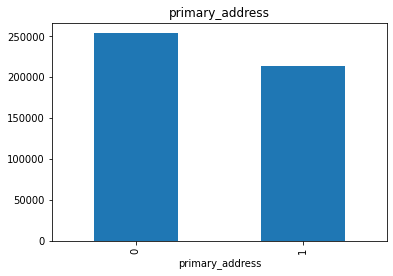

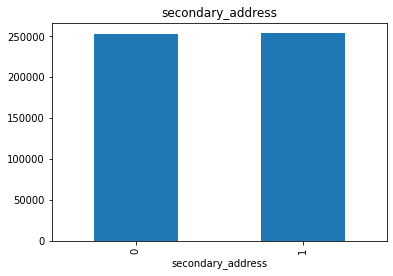

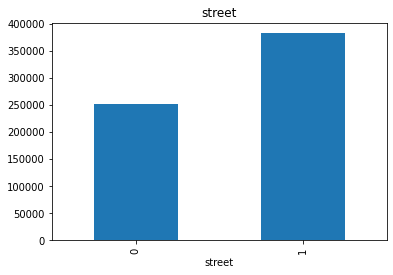

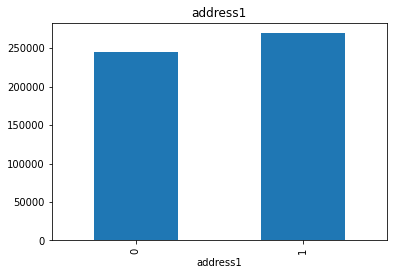

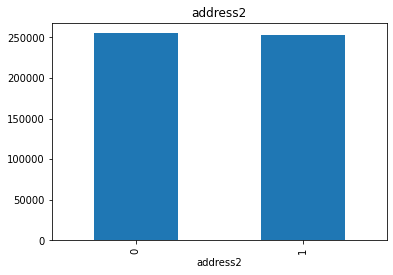

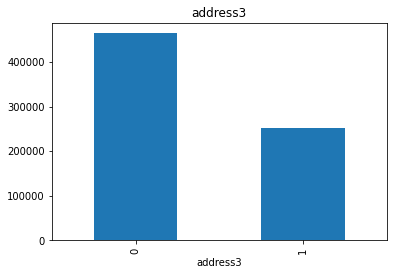

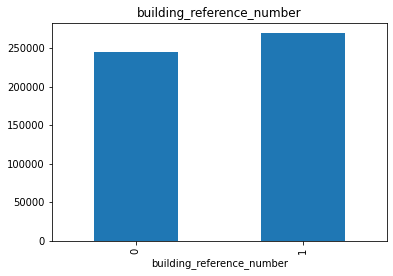

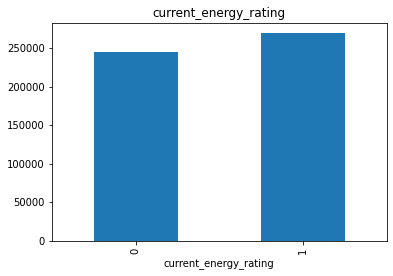

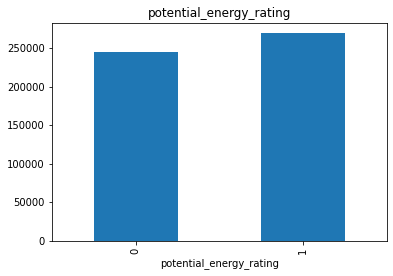

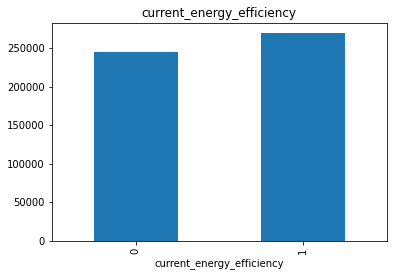

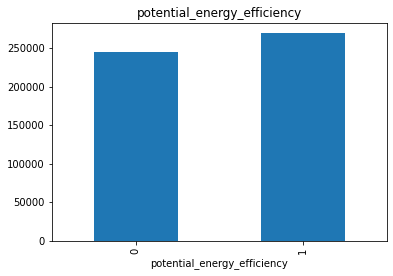

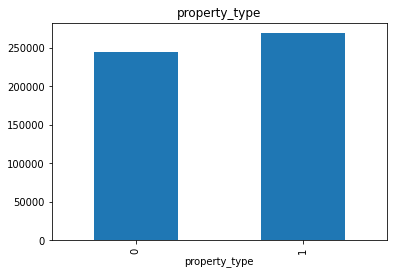

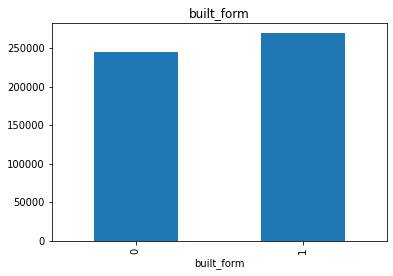

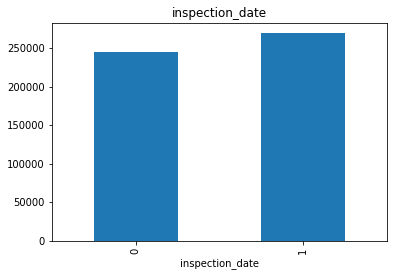

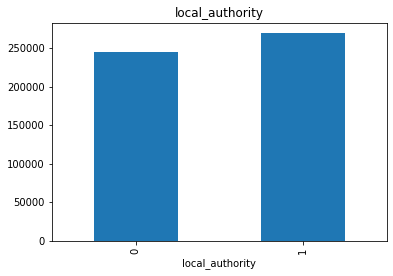

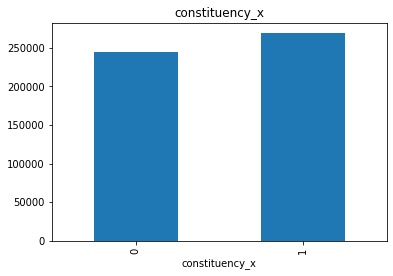

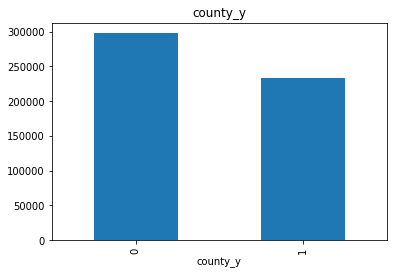

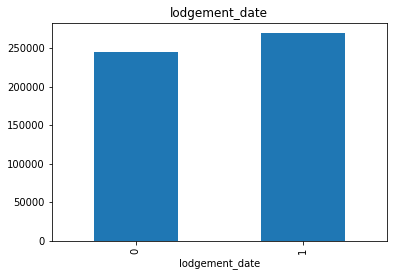

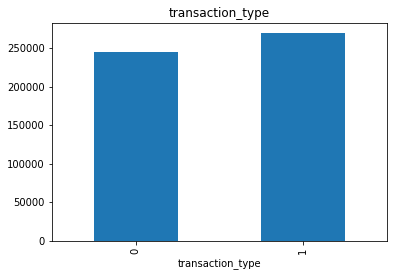

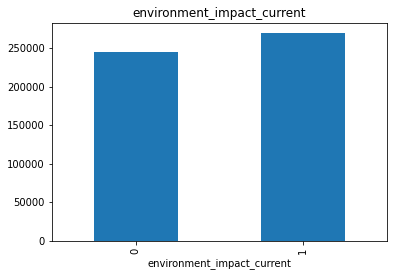

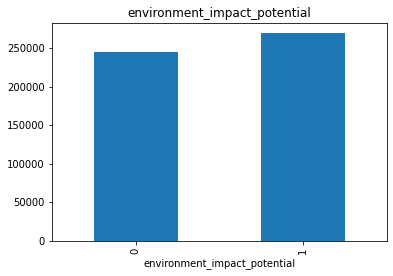

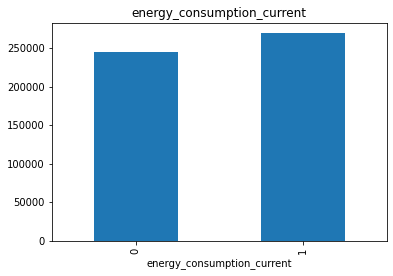

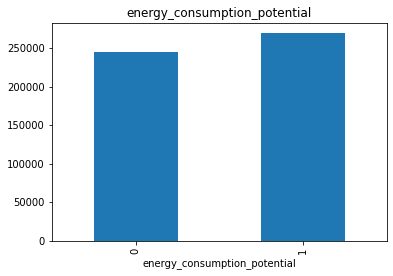

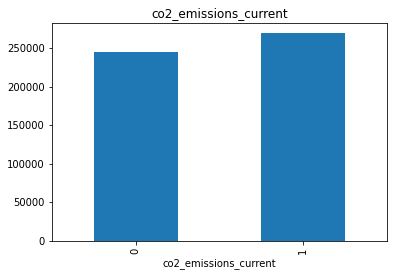

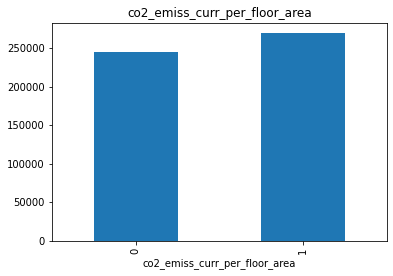

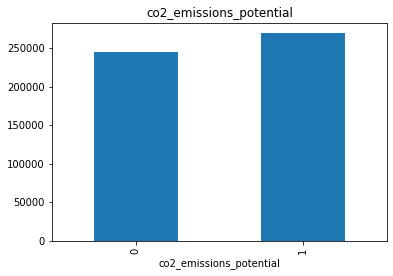

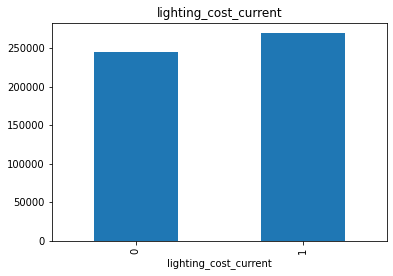

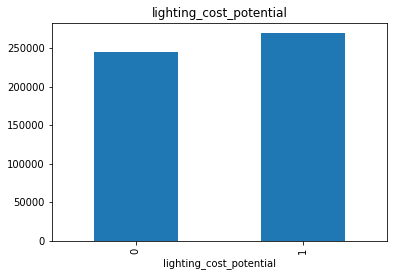

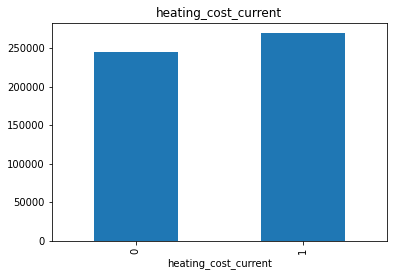

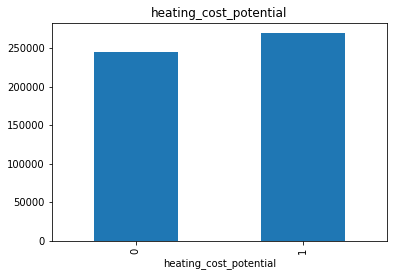

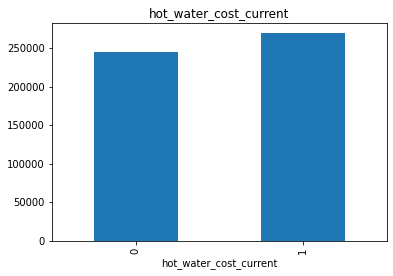

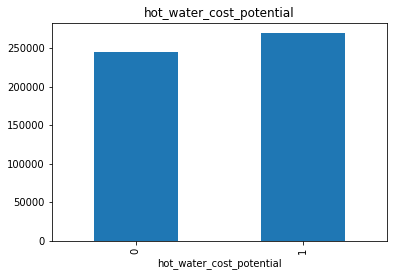

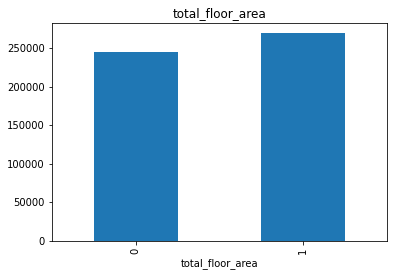

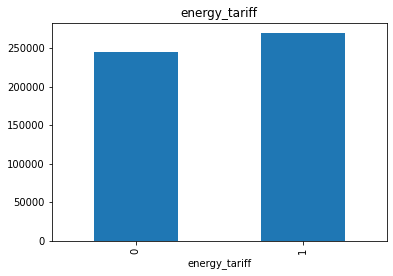

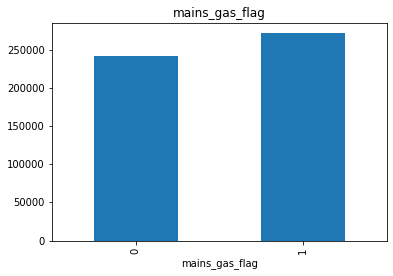

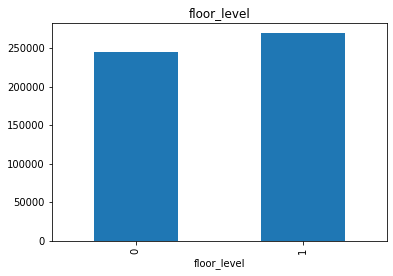

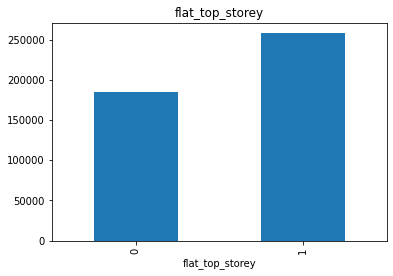

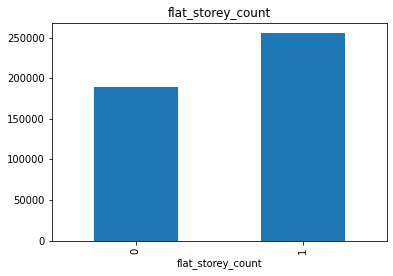

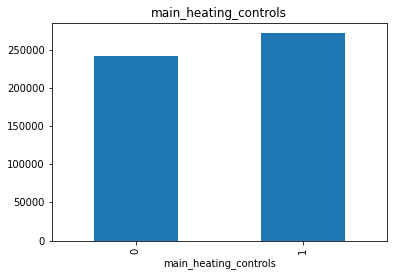

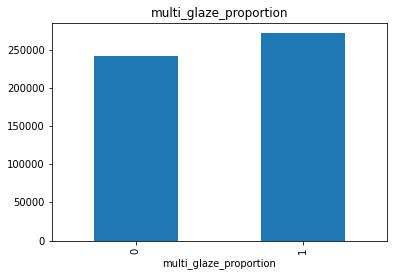

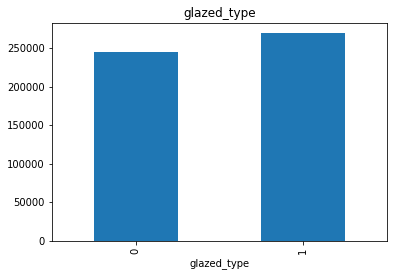

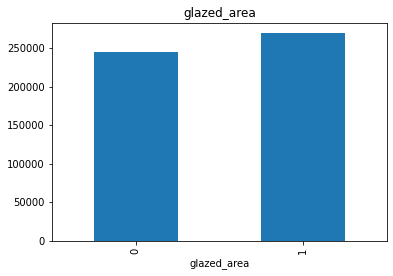

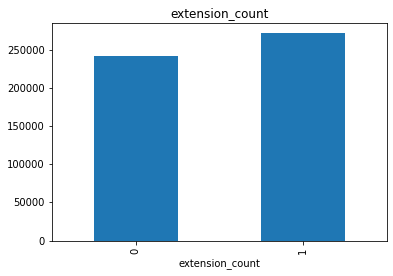

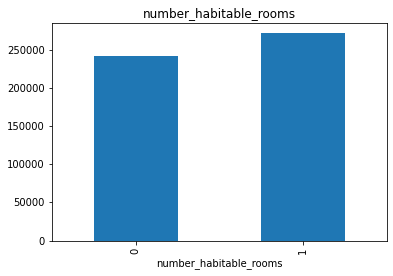

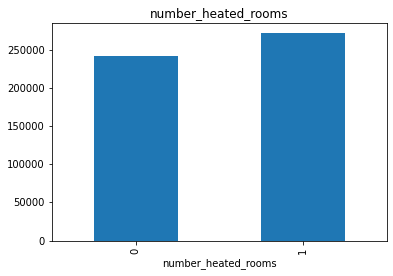

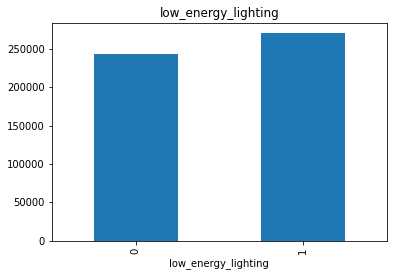

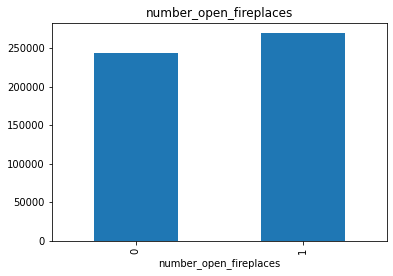

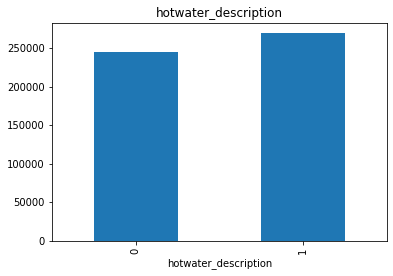

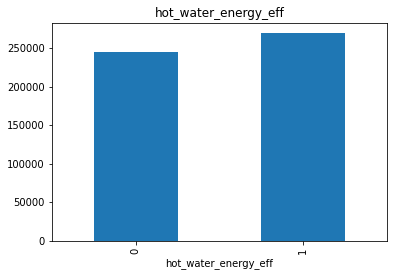

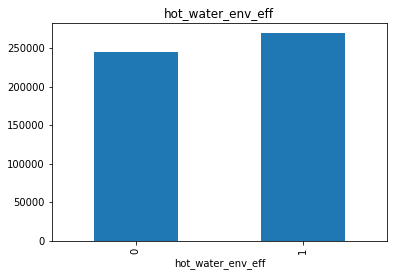

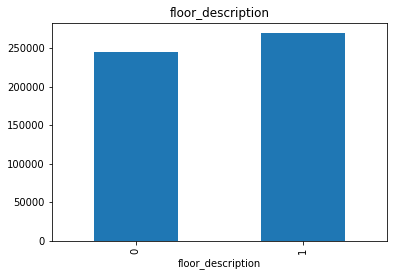

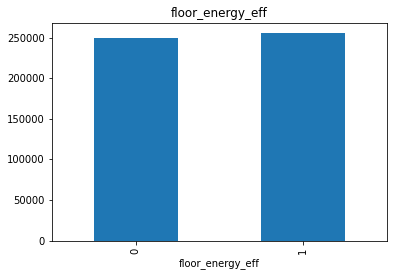

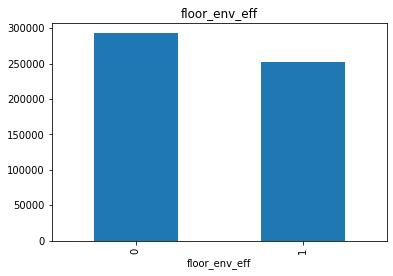

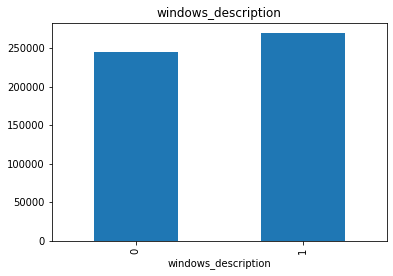

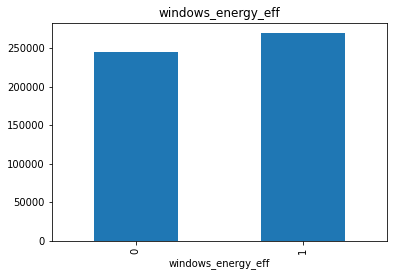

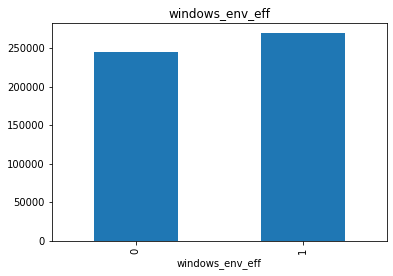

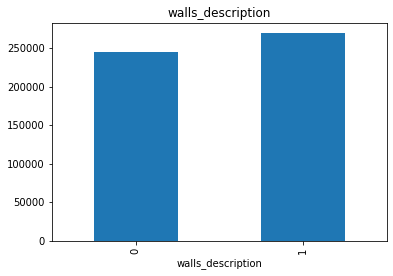

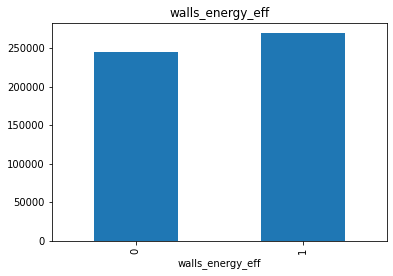

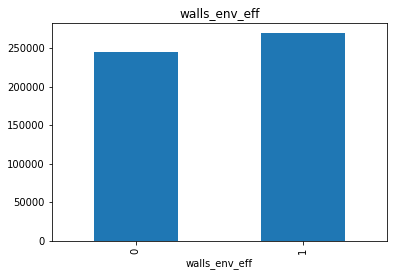

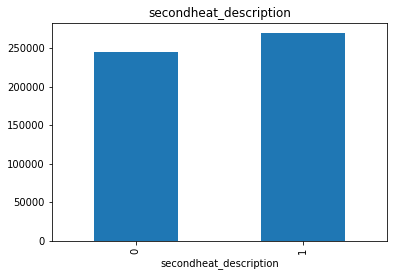

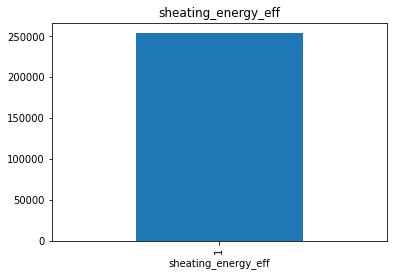

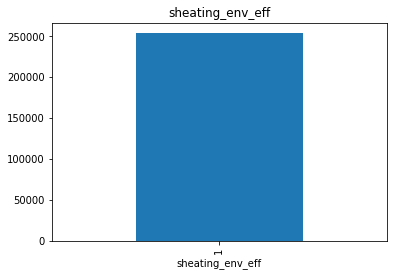

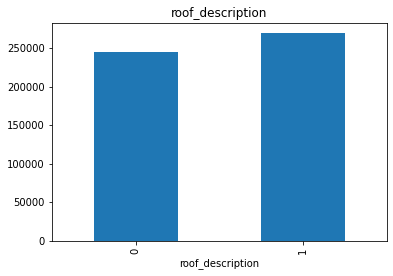

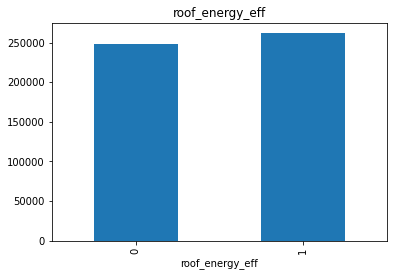

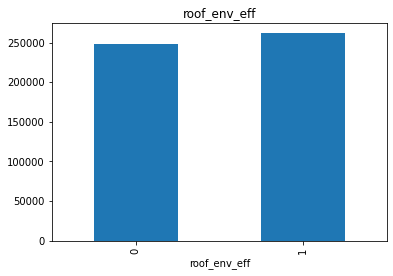

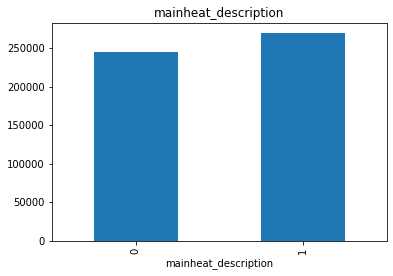

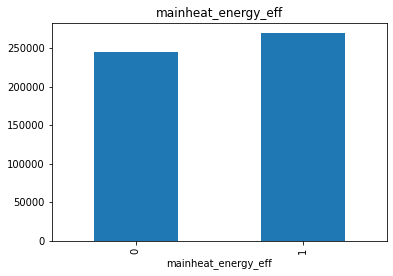

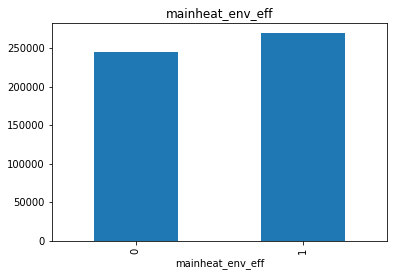

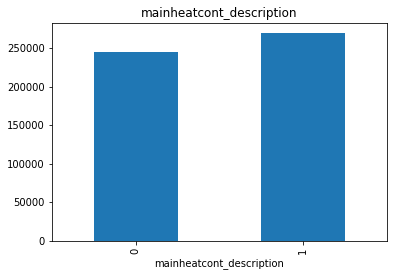

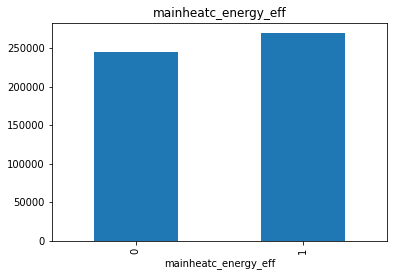

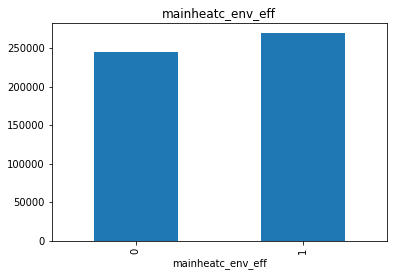

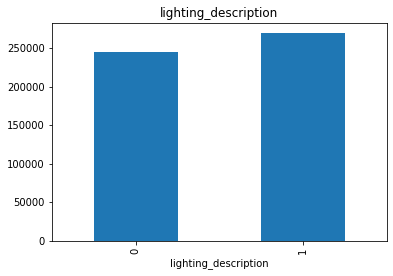

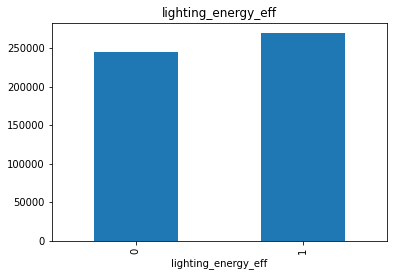

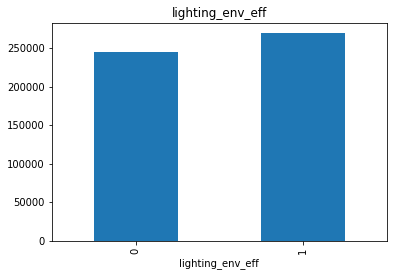

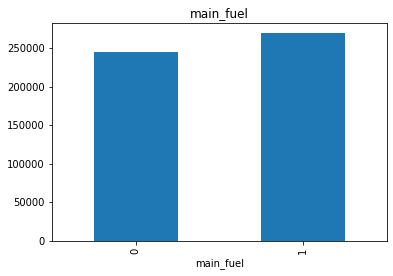

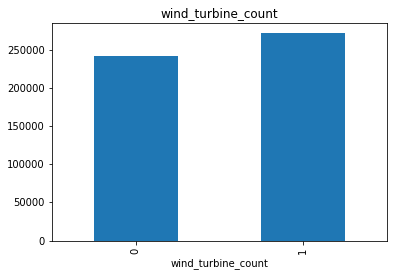

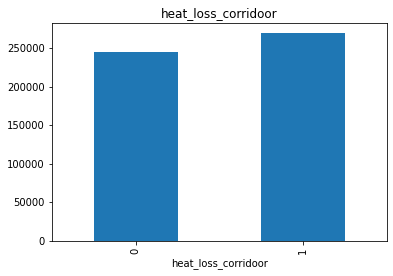

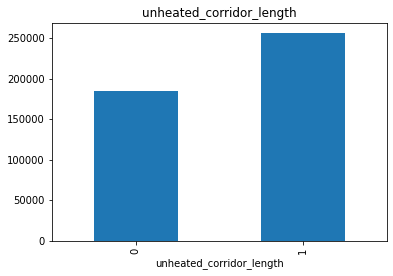

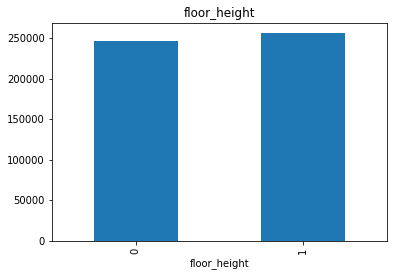

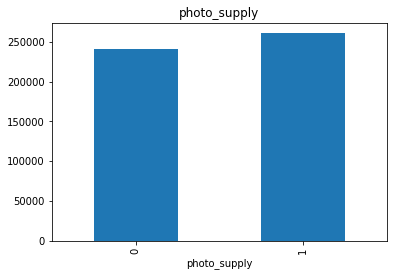

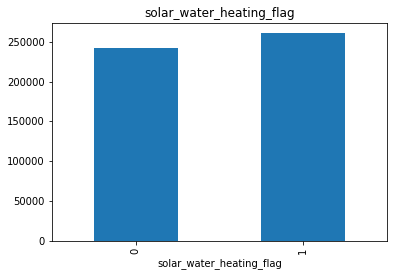

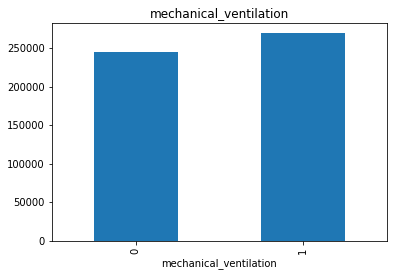

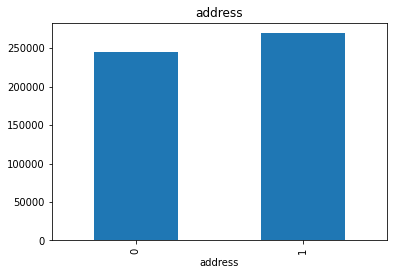

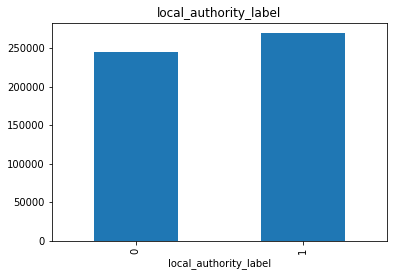

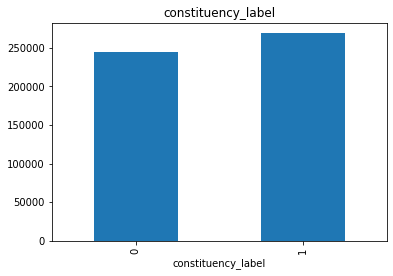

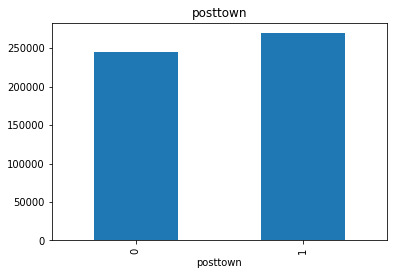

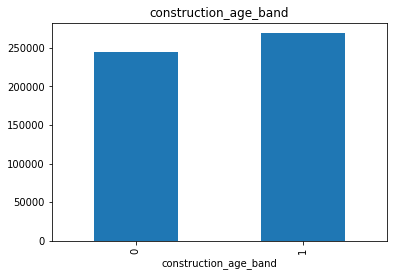

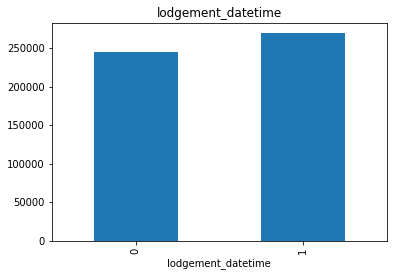

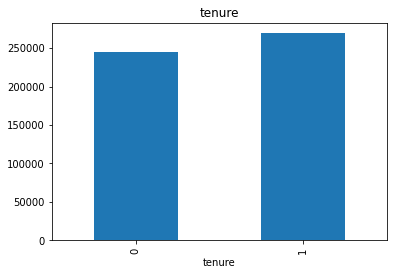

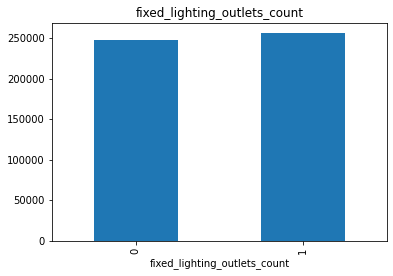

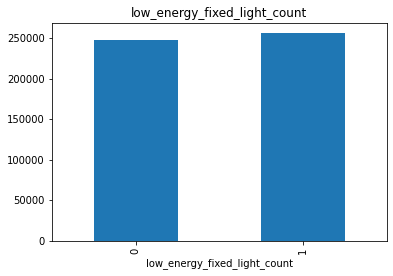

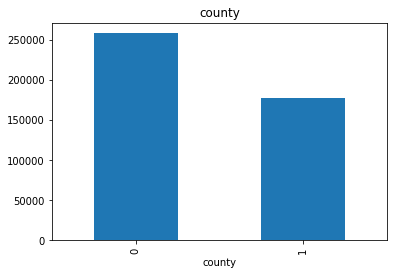

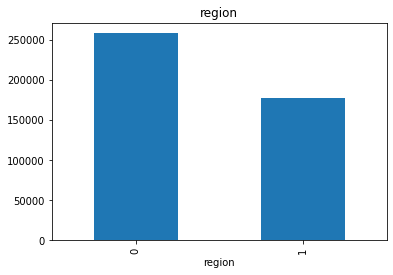

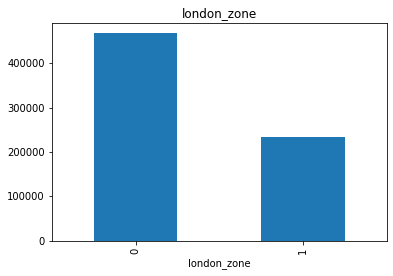

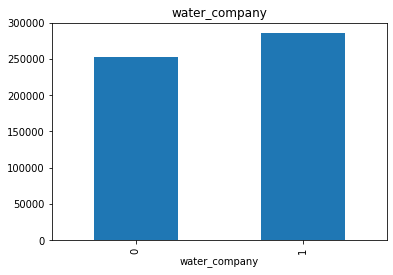

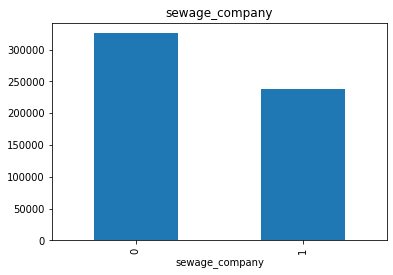

In [12]:
def analyse_na_value(df, var):

    df = df.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where a value is available

    df.groupby(var)['adjusted_price'].median().plot.bar()

    plt.title(var)
    plt.show()


# let's run the function on each variable with missing data
for var in vars_with_na:
    analyse_na_value(data, var)

The average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists. 

We will capture this information when we engineer the variables in our next lecture / video.

### Numerical variables

Let's go ahead and find out what numerical variables we have in the dataset

In [13]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'object']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  43


,price,building_reference_number,current_energy_efficiency,potential_energy_efficiency,environment_impact_current,environment_impact_potential,energy_consumption_current,energy_consumption_potential,co2_emissions_current,co2_emiss_curr_per_floor_area,co2_emissions_potential,lighting_cost_current,lighting_cost_potential,heating_cost_current,heating_cost_potential,hot_water_cost_current,hot_water_cost_potential,total_floor_area,flat_storey_count,main_heating_controls,multi_glaze_proportion,extension_count,number_habitable_rooms,number_heated_rooms,low_energy_lighting,number_open_fireplaces,sheating_energy_eff,sheating_env_eff,wind_turbine_count,unheated_corridor_length,floor_height,photo_supply,fixed_lighting_outlets_count,low_energy_fixed_light_count,latitude,longitude,london_zone,quality,user_type,distance_to_station,average_income,altitude,adjusted_price
0,383000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.566885,-0.203169,3.0,1.0,0.0,0.825966,50100.0,57.0,580749
1,120000,5.010500e+09,82.0,83.0,87.0,88.0,84.0,77.0,1.1,16.0,1.0,65.0,41.0,225.0,228.0,50.0,50.0,72.52,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0.0,NaN,2.4,NaN,10.0,4.0,51.230140,1.400401,NaN,1.0,0.0,0.796283,40300.0,4.0,186903
2,170000,5.437711e+09,72.0,83.0,71.0,82.0,144.0,80.0,3.5,28.0,2.0,94.0,64.0,607.0,537.0,90.0,90.0,126.00,NaN,2106.0,100.0,0.0,6.0,6.0,53.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,15.0,8.0,51.349873,1.427294,NaN,1.0,0.0,0.475358,40500.0,40.0,303694
3,80000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.594163,-1.078230,NaN,1.0,0.0,3.996810,43300.0,104.0,357255
4,190000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.599635,-0.014554,4.0,1.0,0.0,1.384140,49200.0,16.0,239246


From the above view of the dataset, we notice the variable Id, which is an indicator of the house. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each house in the dataset. See below:

In [14]:
print('Number of House Id labels: ', len(data.id.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House Id labels:  171910
Number of Houses in the Dataset:  171910


In [8]:
data.head(2)

,id,price,date,postcode,type,new_build,land,primary_address,secondary_address,street,ppd,record,building_reference_number,current_energy_rating,potential_energy_rating,current_energy_efficiency,potential_energy_efficiency,property_type,built_form,inspection_date,lodgement_date,transaction_type,environment_impact_current,environment_impact_potential,energy_consumption_current,energy_consumption_potential,co2_emissions_current,co2_emiss_curr_per_floor_area,co2_emissions_potential,lighting_cost_current,lighting_cost_potential,heating_cost_current,heating_cost_potential,hot_water_cost_current,hot_water_cost_potential,total_floor_area,energy_tariff,mains_gas_flag,floor_level,main_heating_controls,multi_glaze_proportion,glazed_type,glazed_area,extension_count,number_habitable_rooms,number_heated_rooms,low_energy_lighting,number_open_fireplaces,hotwater_description,hot_water_energy_eff,hot_water_env_eff,floor_description,floor_energy_eff,floor_env_eff,windows_description,windows_energy_eff,windows_env_eff,walls_description,walls_energy_eff,walls_env_eff,secondheat_description,roof_description,roof_energy_eff,roof_env_eff,mainheat_description,mainheat_energy_eff,mainheat_env_eff,mainheatcont_description,mainheatc_energy_eff,mainheatc_env_eff,lighting_description,lighting_energy_eff,lighting_env_eff,main_fuel,wind_turbine_count,heat_loss_corridoor,solar_water_heating_flag,mechanical_ventilation,address,construction_age_band,lodgement_datetime,tenure,month_year,current_month,latitude,longitude,grid_ref,county,district,ward,district_code,ward_code,county_code,constituency,region,london_zone,middle_layer_super_output_area,postcode_area,postcode_district,quality,user_type,last_updated,nearest_station,distance_to_station,postcode_area_1,postcode_district_1,police_force,water_company,plus_code,average_income,sewage_company,travel_to_work_area,rural_urban,altitude,hpi_date,region_name,area_code,adjusted_price
0,{444CA773-C2A1-4A68-845C-DA2FA1F9BA81},26000,1995-01-02,DN35 7BB,T,N,F,59,NaN,DAUBNEY STREET,A,A,4259786078,D,B,65,87,House,Mid-Terrace,05/04/2013,05/04/2013,rental (private),63,88,222,68.0,3.6,43.0,1.2,67.0,48.0,616.0,384.0,100.0,76.0,84.0,Single,Y,NODATA!,2102,100.0,"double glazing, unknown install date",Normal,2.0,4.0,4.0,60.0,0.0,From main system,Good,Good,"Solid, no insulation (assumed)",NaN,NaN,Fully double glazed,Average,Average,"Solid brick, as built, no insulation (assumed)",Very Poor,Very Poor,None,"Pitched, 250 mm loft insulation",Good,Good,"Boiler and radiators, mains gas",Good,Good,"Programmer, no room thermostat",Very Poor,Very Poor,Low energy lighting in 60% of fixed outlets,Good,Good,mains gas (not community),0.0,NO DATA!,NaN,natural,"59, Daubney Street",England and Wales: before 1900,05/04/2013 14:42,rental (private),1995-01-01,2020-11-01,53.571403,-0.052008,TA290100,Lincolnshire,North East Lincolnshire,Sidney Sussex,E06000012,E05001722,E10000019,Cleethorpes,Yorkshire and The Humber,NaN,Sidney Park,DN,DN35,1.0,0.0,2020-11-21,New Clee,0.668402,DN,DN35,Humberside,Anglian Water,9C5XHWCX+H5,29900.0,NaN,Grimsby,Urban city and town,3.0,1995-01-01,North East Lincolnshire,E06000012,88639
1,{1CEF4E37-69DF-49A0-A4B1-972D3E7135A9},32000,1995-01-03,L4 1TS,T,N,L,62,NaN,GARNETT AVENUE,A,A,5016984678,E,C,48,79,House,Mid-Terrace,06/06/2019,06/06/2019,marketed sale,40,74,376,140.0,6.6,66.0,2.5,69.0,69.0,1035.0,615.0,219.0,73.0,99.0,Single,Y,NODATA!,2106,100.0,"double glazing, unknown install date",Normal,2.0,4.0,4.0,100.0,0.0,"From main system, no cylinder thermostat",Poor,Poor,"Suspended, no insulation (assumed)",NO DATA!,NaN,Fully double glazed,Average,Average,"Solid brick, as built, no insulation (assumed)",Very Poor,Very Poor,None,"Pitched, no insulation (assumed)",Very Poor,Very Poor,"Boiler and radiators, mains gas",Good,Good,"Programmer, room thermostat and TRVs",Good,Good,Low energy lighting in all fixed outlets,Very Good,Very Good,mains gas (not community),0.0,NO DATA!,N,natural,"62, Garnett Avenue",England and Wales: 1930-194

#### Temporal variables

We have 4 year variables in the dataset:

- YearBuilt: year in which the house was built
- YearRemodAdd: year in which the house was remodeled
- GarageYrBlt: year in which a garage was built
- YrSold: year in which the house was sold

We generally don't use date variables in their raw format. Instead, we extract information from them. For example, we can capture the difference in years between the year the house was built and the year the house was sold.

In [12]:
# list of variables that contain year information

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [13]:
# let's explore the values of these temporal variables

for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

As expected, the values are years.

We can explore the evolution of the sale price with the years in which the house was sold:

Text(0.5, 1.0, 'Change in House price with the years')

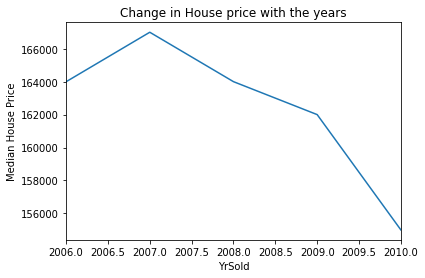

In [14]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('Change in House price with the years')

There has been a drop in the value of the houses. That is unusual, in real life, house prices typically go up as years go by.


Let's go ahead and explore whether there is a relationship between the year variables and SalePrice. For this, we will capture the elapsed years between the Year variables and the year in which the house was sold:

In [15]:
# let's explore the relationship between the year variables
# and the house price in a bit of more detail:

def analyse_year_vars(df, var):
    df = df.copy()
    
    # capture difference between year variable and year
    # in which the house was sold
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)
    

NameError: name 'year_vars' is not defined

We see that there is a tendency to a decrease in price, with older features. In other words, the longer the time between the house was built or remodeled and sale date, the lower the sale Price. 

Which makes sense, cause this means that the house will have an older look, and potentially needs repairs.

#### Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [9]:
#  let's make a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  7


In [10]:
# let's visualise the discrete variables

data[discrete_vars].head()

,extension_count,number_heated_rooms,number_open_fireplaces,wind_turbine_count,london_zone,quality,user_type
0,2.0,4.0,0.0,0.0,NaN,1.0,0.0
1,2.0,4.0,0.0,0.0,NaN,1.0,0.0
2,1.0,3.0,0.0,0.0,NaN,1.0,0.0
3,2.0,5.0,0.0,0.0,NaN,1.0,0.0
4,1.0,2.0,0.0,0.0,NaN,1.0,0.0


These discrete variables tend to be qualifications or grading scales, or refer to the number of rooms, or units.

Let's go ahead and analyse their contribution to the house price.

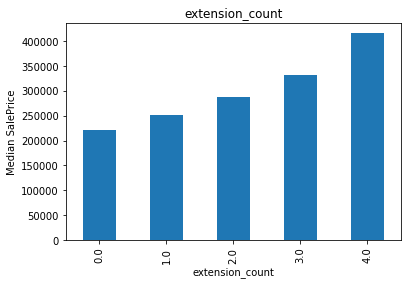

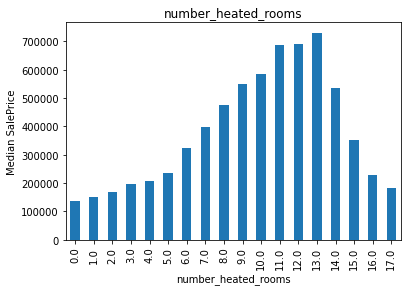

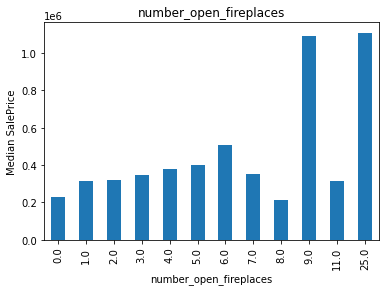

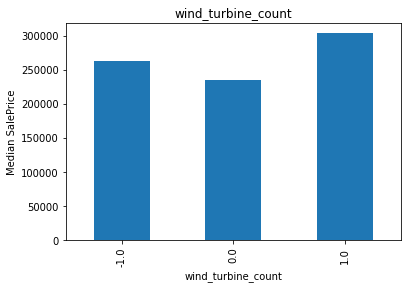

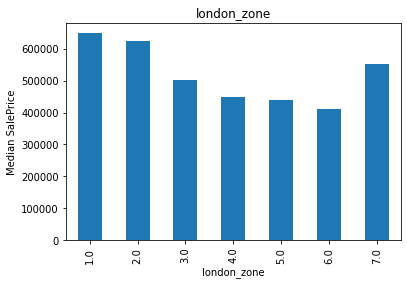

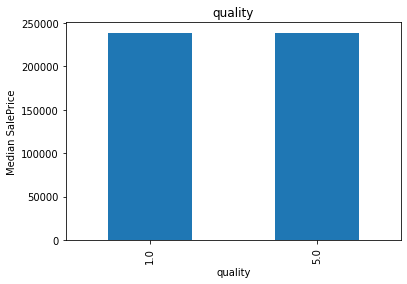

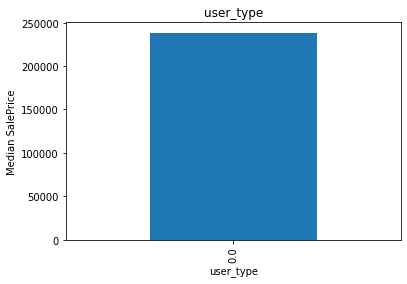

In [11]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['adjusted_price'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Median SalePrice')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

There tend to be a relationship between the variables values and the SalePrice, but this relationship is not always monotonic. 

For example, for OverallQual, there is a monotonic relationship: the higher the quality, the higher the SalePrice.  

However, for OverallCond, the relationship is not monotonic. Clearly, some Condition grades, like 5, correlate with higher sale prices, but higher values do not necessarily do so. We need to be careful on how we engineer these variables to extract maximum value for a linear model.

There are ways to re-arrange the order of the discrete values of a variable, to create a monotonic relationship between the variable and the target. However, for the purpose of this course, we will not do that, to keep feature engineering simple. If you want to learn more about how to engineer features, visit our course [Feature Engineering for Machine Learning](https://www.udemy.com/feature-engineering-for-machine-learning/?couponCode=UDEMY2018) in Udemy.

#### Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete variables in our dataset.

In [12]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  27


In [17]:
# let's visualise the continuous variables

data[cont_vars].corr().loc['adjusted_price']

price                            0.767327
building_reference_number       -0.002639
current_energy_efficiency        0.011816
potential_energy_efficiency     -0.072585
environment_impact_current      -0.018407
environment_impact_potential    -0.090375
energy_consumption_current      -0.151501
energy_consumption_potential    -0.057025
co2_emissions_current            0.073113
co2_emiss_curr_per_floor_area   -0.151462
co2_emissions_potential          0.068582
lighting_cost_current            0.414567
lighting_cost_potential          0.437272
heating_cost_current             0.231979
heating_cost_potential           0.298705
hot_water_cost_current           0.065919
hot_water_cost_potential         0.168224
total_floor_area                 0.090981
multi_glaze_proportion          -0.096227
number_habitable_rooms           0.404417
low_energy_lighting             -0.058151
latitude                        -0.413087
longitude                        0.294426
distance_to_station             -0

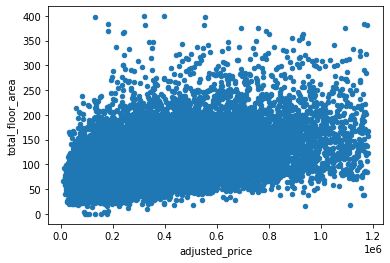

In [21]:
ax1 = data[data['total_floor_area'] < 400].plot.scatter(x='adjusted_price',
                     y='total_floor_area')

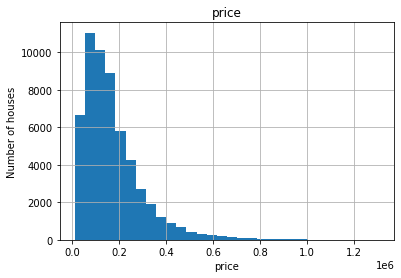

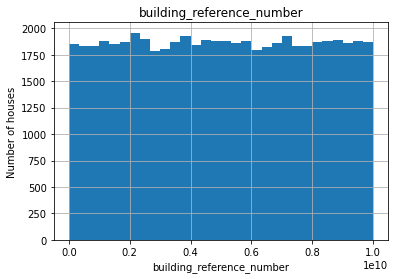

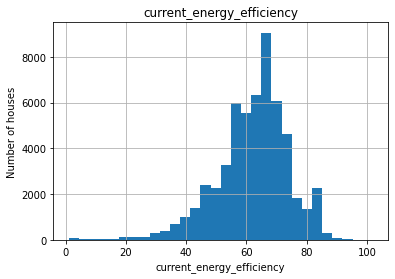

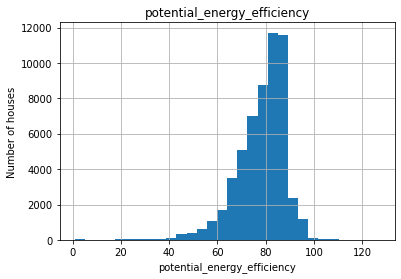

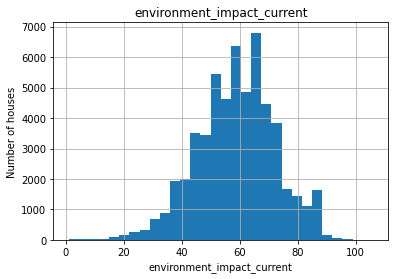

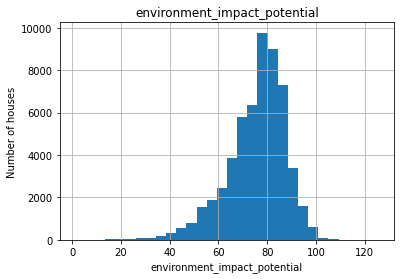

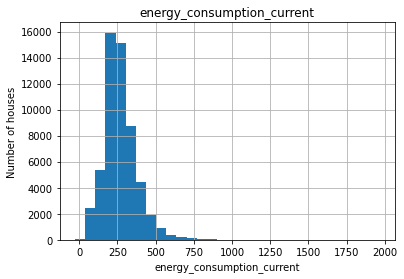

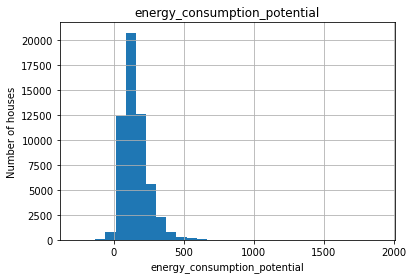

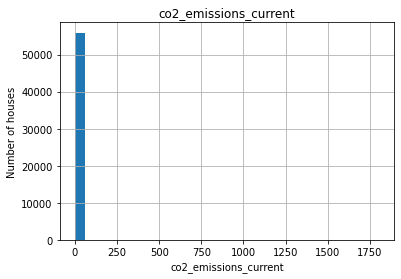

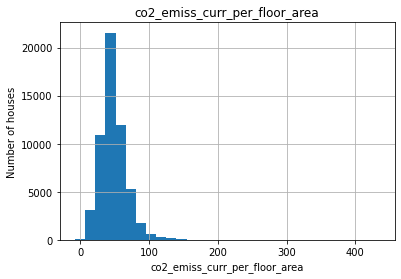

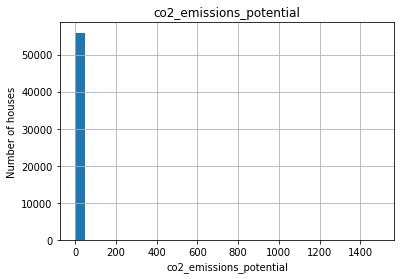

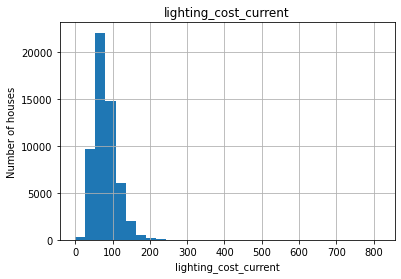

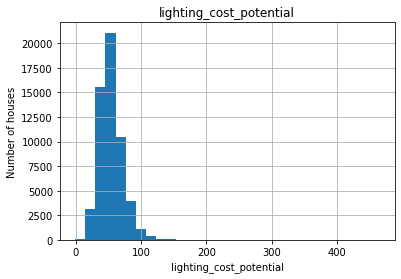

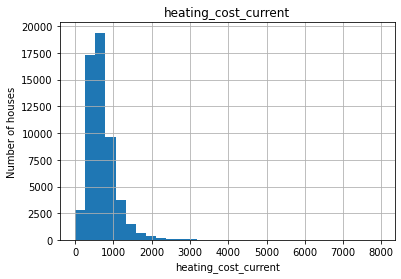

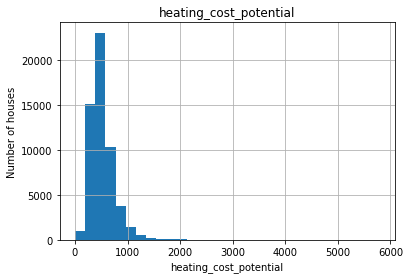

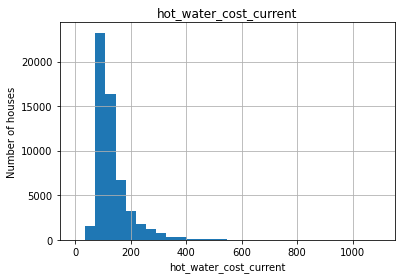

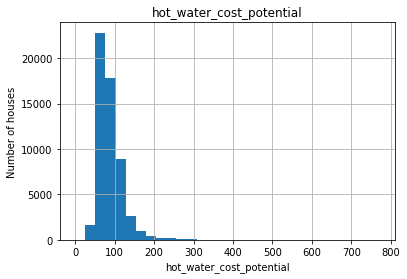

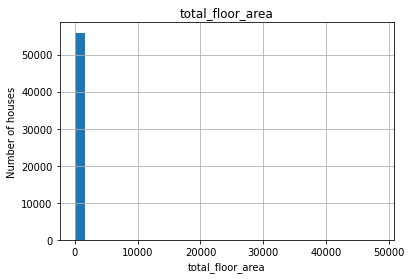

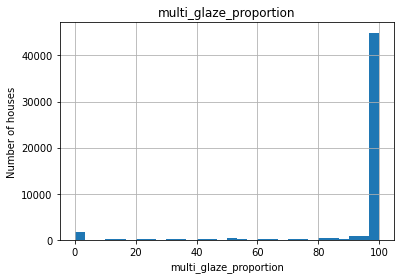

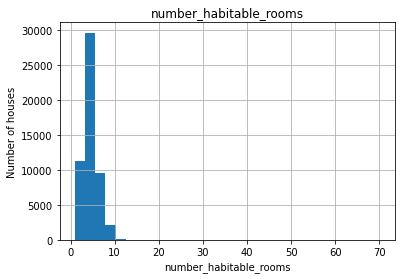

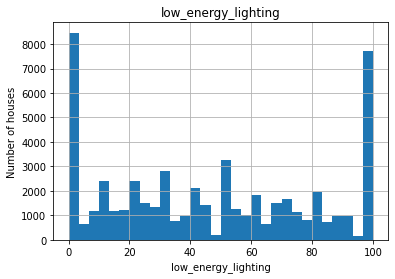

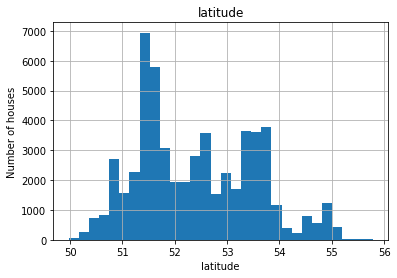

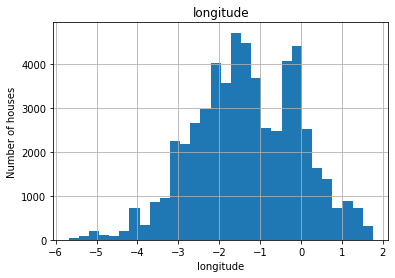

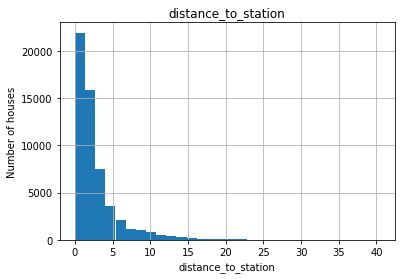

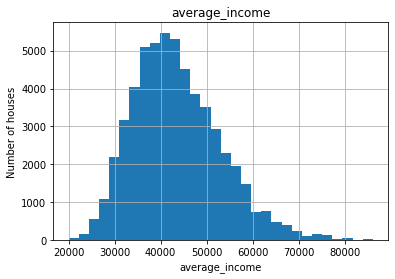

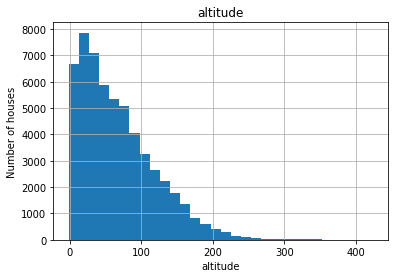

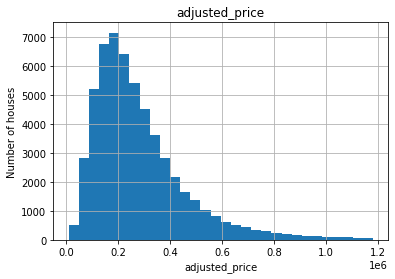

In [14]:
# Let's go ahead and analyse the distributions of these variables


def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Number of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
0

for var in cont_vars:
    analyse_continuous(data, var)

The variables are not normally distributed, including the target variable 'SalePrice'. 

Sometimes, transforming the variables to improve the value spread, improves the model performance. Thus, we will transform our variables in the next lecture / video, during our feature engineering step.

Let's evaluate if a logarithmic transformation of the variables returns values that follow a normal distribution:

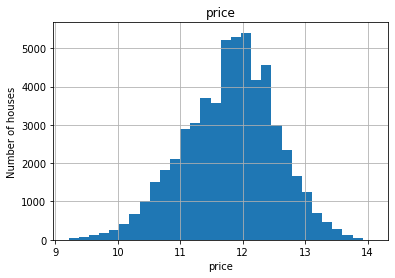

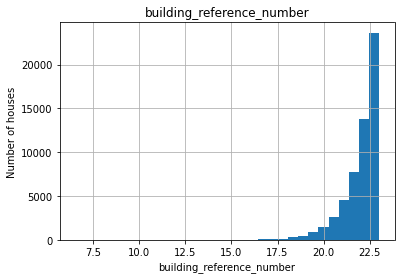

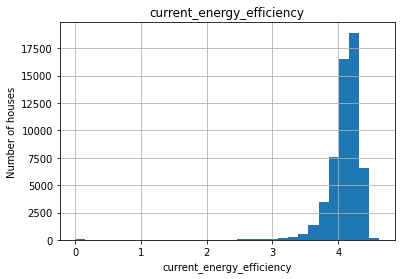

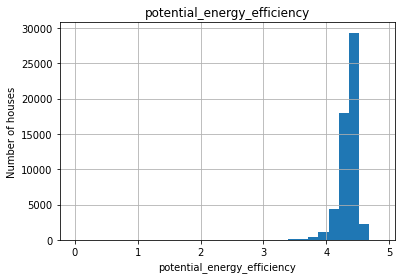

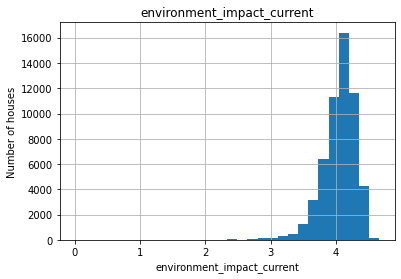

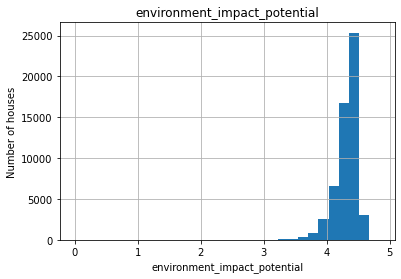

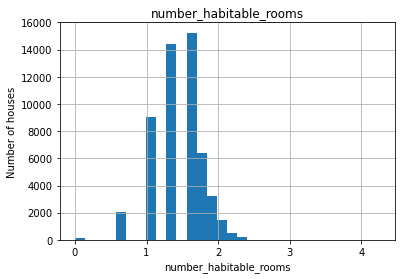

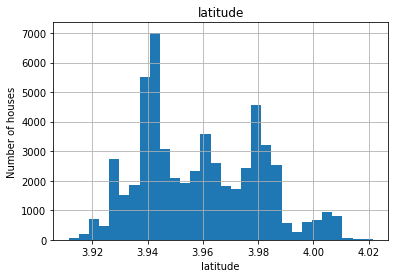

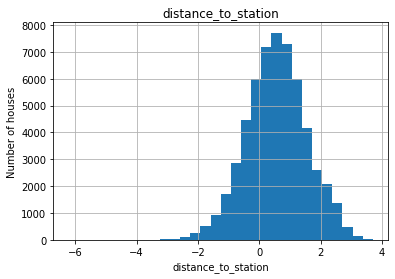

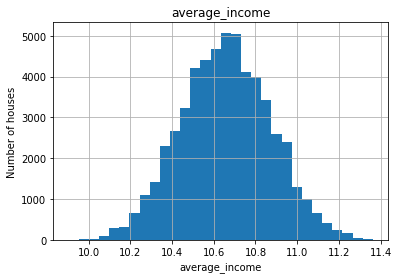

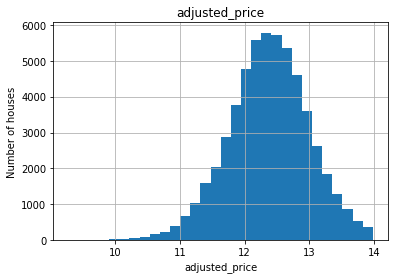

In [15]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation


def analyse_transformed_continuous(df, var):
    df = df.copy()

    # log does not take 0 or negative values, so let's be
    # careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=30)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()


for var in cont_vars:
    analyse_transformed_continuous(data, var)

We get a better spread of the values for most variables when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

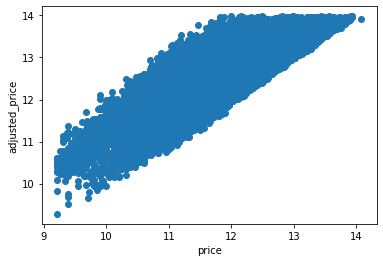

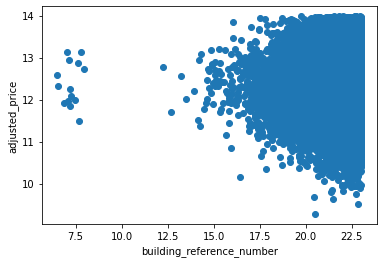

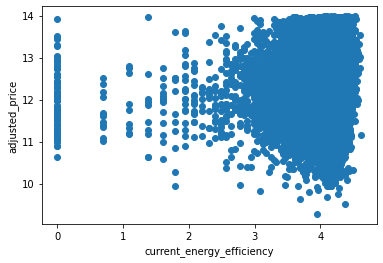

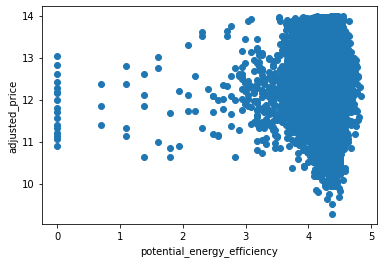

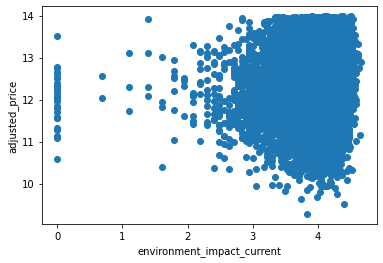

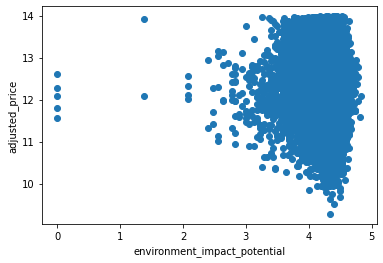

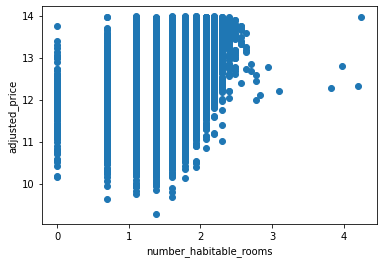

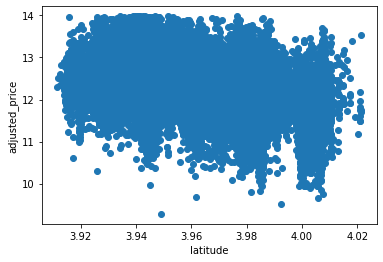

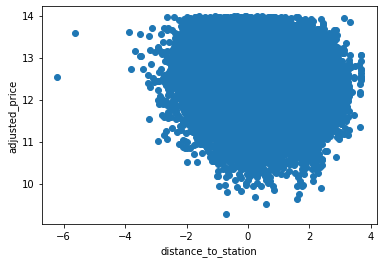

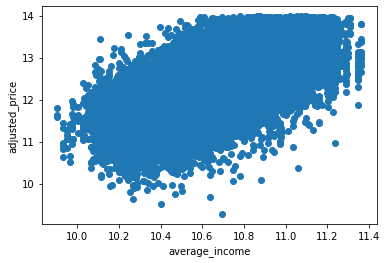

In [22]:
# let's explore the relationship between the house price and
# the transformed variables with more detail:


def transform_analyse_continuous(df, var):
    df = df.copy()

    # log does not take negative values, so let's be careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        
        # log transform the target (remember it was also skewed)
        df['adjusted_price'] = np.log(df['adjusted_price'])
        
        # plot
        plt.scatter(df[var], df['adjusted_price'])
        plt.ylabel('adjusted_price')
        plt.xlabel(var)
        plt.show()


for var in cont_vars:
    if var != 'adjusted_price':
        transform_analyse_continuous(data, var)

From the previous plots, we observe some monotonic associations between SalePrice and the variables to which we applied the log transformation, for example 'GrLivArea'.

#### Outliers

Extreme values may affect the performance of a linear model. Let's find out if we have any in our variables.

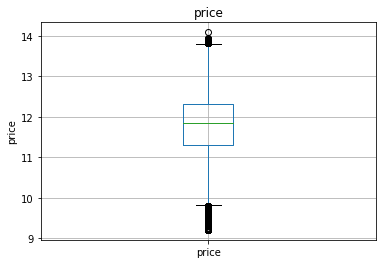

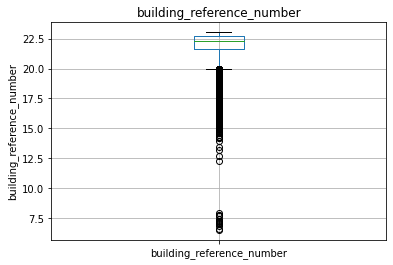

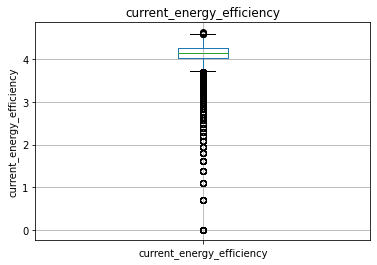

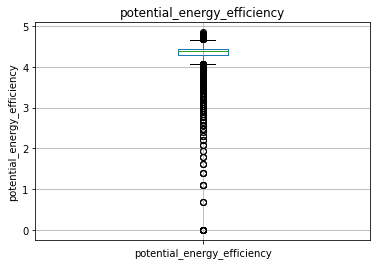

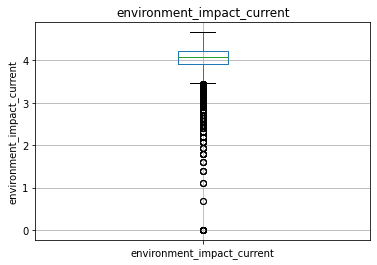

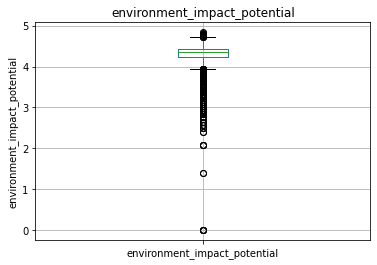

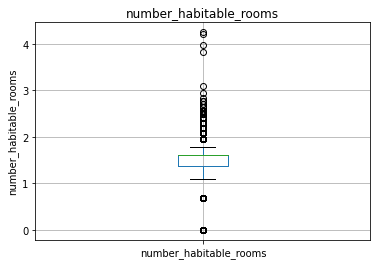

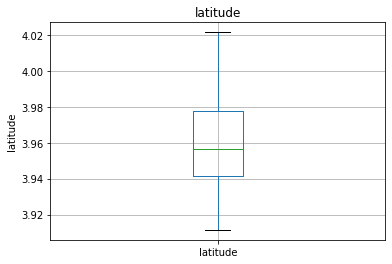

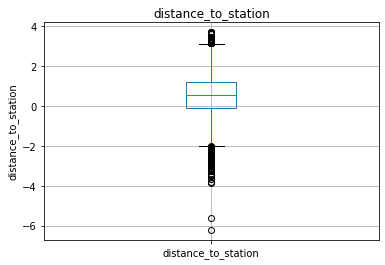

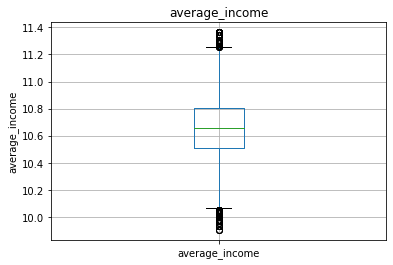

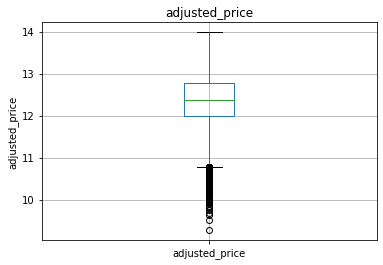

In [23]:
# let's make boxplots to visualise outliers in the continuous variables


def find_outliers(df, var):
    df = df.copy()

    # log does not take negative values, so let's be
    # careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()


for var in cont_vars:
    find_outliers(data, var)

The majority of the continuous variables seem to contain outliers. Outliers tend to affect the performance of linear model. So it is worth spending some time understanding if removing outliers will add performance value to our  final machine learning model.

The purpose of this course is however to teach you how to put your models in production. Therefore, we will not spend more time looking at how best to remove outliers, and we will rather deploy a simpler model.

However, if you want to learn more about the value of removing outliers, visit our course [Feature Engineering for Machine Learning](https://www.udemy.com/feature-engineering-for-machine-learning/?couponCode=UDEMY2018).

The same is true for variable transformation. There are multiple ways to improve the spread of the variable over a wider range of values. You can learn more about it in our course [Feature Engineering for Machine Learning](https://www.udemy.com/feature-engineering-for-machine-learning/?couponCode=UDEMY2018).

### Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [33]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  30


In [34]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

,id,date,postcode,type,new_build,land,primary_address,secondary_address,street,ppd,record,month_year,current_month,grid_ref,county,district,ward,district_code,ward_code,county_code,constituency,region,middle_layer_super_output_area,postcode_area,postcode_district,hpi_date,region_name,area_code,stadium_name,station
0,{64342BFE-A654-422C-E053-6C04A8C0FB8A},2017-11-10,NG20 0FH,D,N,F,16,NaN,WATERFIELD AVENUE,A,A,2017-11-01,2020-10-01,SK564680,Nottinghamshire,Mansfield,Warsop Carrs,E07000174,E05008889,E10000024,Mansfield,East Midlands,Market Warsop,NG,NG20,2017-11-01,Mansfield,E07000174,Field Mill,Shirebrook
1,{B5BE7907-AA7F-4591-A2EE-52430EA0DC94},2004-04-23,CR0 3NT,S,N,F,3,NaN,ALLEN ROAD,A,A,2004-04-01,2020-10-01,TQ309664,Greater London,Croydon,Broad Green,E09000008,E05011465,E11000009,Croydon North,London,Broad Green & Waddon Marsh,CR,CR0,2004-04-01,Croydon,E09000008,Selhurst Park,Waddon
2,{1D2D3DF4-94EB-4A49-B2AD-CB9EE812E7BF},2004-10-15,GL20 8LH,F,N,L,32,NaN,PAMINGTON FIELDS,A,A,2004-10-01,2020-10-01,SO930332,Gloucestershire,Tewkesbury,Isbourne,E07000083,E05012075,E10000013,Tewkesbury,South West,Tewkesbury East & Ashchurch,GL,GL20,2004-10-01,Tewkesbury,E07000083,Whaddon Road,Ashchurch for Tewkesbury
3,{1B1B0F04-A1DF-42C8-9F7B-81078C124EDA},2002-04-10,SK14 4PT,T,N,F,14,NaN,KIRKSTONE ROAD,A,A,2002-04-01,2020-10-01,SJ943962,Greater Manchester,Tameside,Hyde Newton,E08000008,E05000812,E11000010,Stalybridge and Hyde,North West,Hyde North,SK,SK14,2002-04-01,Tameside,E08000008,Boundary Park,Hyde North
4,{64342BFE-B0A7-422C-E053-6C04A8C0FB8A},2018-01-17,OX3 8AE,S,N,F,38,NaN,HOLYOAKE ROAD,A,A,2018-01-01,2020-10-01,SP546070,Oxfordshire,Oxford,Quarry and Risinghurst,E07000178,E05006562,E10000025,Oxford East,South East,Risinghurst & Sandhills,OX,OX3,2018-01-01,Oxford,E07000178,Kassam Stadium,Oxford


#### Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

In [35]:
data[cat_vars].nunique()

id                                100000
date                                6790
postcode                           92427
type                                   5
new_build                              2
land                                   2
primary_address                    13097
secondary_address                   1326
street                             52443
ppd                                    2
record                                 1
month_year                           310
current_month                          1
grid_ref                           88771
county                                48
district                             335
ward                                7372
district_code                        335
ward_code                           7953
county_code                           49
constituency                         573
region                                 9
middle_layer_super_output_area      7129
postcode_area                        105
postcode_distric

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture.

#### Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [37]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['adjusted_price'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

id
{00000893-5D5D-4624-911E-38CCFFC438D1}    0.00001
{0000FB4A-3FBD-4A29-8B33-0E0A80C9037B}    0.00001
{00022D86-C854-46B5-BD34-6C5FA839FE4C}    0.00001
{0002CC22-FAA1-43FA-A8E1-8B567B0EE338}    0.00001
{0003DEBF-25A3-4B71-A1CD-2F92D55D27C0}    0.00001
                                           ...   
{FFFE633E-DFB4-4706-B142-4A5F966D4F99}    0.00001
{FFFE6F44-B1A3-47DA-8739-1763A1897959}    0.00001
{FFFE9FAA-AAC5-46ED-A9F0-9D593F833F47}    0.00001
{FFFF7EC3-6E82-4A13-BB47-1CC7637233F5}    0.00001
{FFFFF50A-A031-4EC8-B9CB-A56B996C99D9}    0.00001
Name: adjusted_price, Length: 100000, dtype: float64

date
1995-01-03    0.00006
1995-01-04    0.00005
1995-01-05    0.00006
1995-01-06    0.00025
1995-01-09    0.00004
               ...   
2020-10-22    0.00001
2020-10-23    0.00003
2020-10-26    0.00001
2020-10-29    0.00004
2020-10-30    0.00002
Name: adjusted_price, Length: 6790, dtype: float64

postcode
AL1 1AJ    0.00001
AL1 1HR    0.00001
AL1 1NN    0.00001
AL1 1PD    0.00001
AL1 1PT  

Some of the categorical variables show multiple labels that are present in less than 1% of the houses. We will engineer these variables in our next video. Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. That is why we want to remove them.

Finally, we want to explore the relationship between the categories of the different variables and the house sale price:

In [38]:
for var in cat_vars:
    # we can re-use the function to determine median
    # sale price, that we created for discrete variables

    analyse_discrete(data, var)

KeyboardInterrupt: 

Clearly, the categories give information on the SalePrice, as different categories show different median sale prices.

In the next video, we will transform these strings / labels into numbers, so that we capture this information and transform it into a monotonic relationship between the category and the house price.

**Disclaimer:**

The data exploration shown in this notebook by no means wants to be an exhaustive data exploration. There is certainly more to be done to understand the nature of this data and the relationship of these variables with the target, SalePrice.

However, we hope that through this notebook we gave you both a flavour of what data analysis looks like, and set the bases for the coming steps in the machine learning model building pipeline. Through data exploration, we decide which feature engineering techniques we will apply to our variables.

That is all for this lecture / notebook. I hope you enjoyed it, and see you in the next one!